

<img src="http://www.toonbarn.com/wordpress/wp-content/uploads/2013/09/Pok%C3%A9mon-Gotta-Catch-Em-All_.jpg">


# Purpose

Create a prototype of a new game, 'Pokemon Stay'. 

The objecive of the game is to collect Pokemon my moving around to different websites on the internet in the comfort of the indoors.

In [149]:
# Import packages
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from __future__ import division

from sklearn.preprocessing import LabelEncoder

### 1. Define a player for prototype testing

---

The player variables are:

    player_id : id code unique to each player (integer)
    player_name : entered name of the player (string)
    time_played : number of time played the game in minutes (float)
    player_pokemon: the player's captured pokemon (dictionary)
    gyms_visited: ids of the gyms that a player has visited (list)

In [2]:
## Prototype player 1 defined: 
player_id = 1
player_name = 'vicki'
time_played = 30.0
player_pokemon = {}
gyms_visited = []

## 2. Define "gym" locations for testing

---

Start with 10 different gym locations, ie. websites on the internet. 
The gym locations are:

    1. 'reddit.com'
    2. 'amazon.com'
    3. 'twitter.com'
    4. 'linkedin.com'
    5. 'ebay.com'
    6. 'netflix.com'
    7. 'sporcle.com'
    8. 'stackoverflow.com'
    9. 'github.com'
    10. 'quora.com'

In [3]:
## Set up a list of all the gym locations 
gym_locations = ['reddit.com','amazon.com','twitter.com','linkedin.com','ebay.com','netflix.com','sporcle.com','stackoverflow.com','github.com','quora.com', 'alcatraz', 'pacific_beach']

## Append two locations to player's list of visited gyms
gyms_visited = [gym_locations[1],gym_locations[5]]

## Verify locations added
print(gyms_visited)

['amazon.com', 'netflix.com']


## 3. Create a collection of pokemon to catch

---

Each pokemon are be defined by these variables:

    pokemon_id : unique identifier for each pokemon (integer)
    name : the name of the pokemon (string)
    type : the category of pokemon (string)
    hp : base hitpoints (integer)
    attack : base attack (integer)
    defense : base defense (integer)
    special_attack : base special attack (integer)
    special_defense : base sepecial defense (integer)
    speed : base speed (integer)

In [4]:
## Create a dictionary of dictionaries for each pokemon character.
## Pokemon_id is key values are the dictionary of features
pokedex = {1: {'name':'charmander',
               'type':'fire',
               'hp':2,
               'attack':3,
               'defense':4,
               'special_attack':5,
               'special_defense':5, 
               'speed':10},
          2: {'name':'squirtle',
               'type':'water',
               'hp':4,
               'attack':2,
               'defense':6,
               'special_attack':3,
               'special_defense':8, 
               'speed':4},
           3: {'name':'bulbasaur',
               'type':'poison',
               'hp':5,
               'attack':1,
               'defense':2,
               'special_attack':3,
               'special_defense':4, 
               'speed':13} }

pprint(pokedex)

{1: {'attack': 3,
     'defense': 4,
     'hp': 2,
     'name': 'charmander',
     'special_attack': 5,
     'special_defense': 5,
     'speed': 10,
     'type': 'fire'},
 2: {'attack': 2,
     'defense': 6,
     'hp': 4,
     'name': 'squirtle',
     'special_attack': 3,
     'special_defense': 8,
     'speed': 4,
     'type': 'water'},
 3: {'attack': 1,
     'defense': 2,
     'hp': 5,
     'name': 'bulbasaur',
     'special_attack': 3,
     'special_defense': 4,
     'speed': 13,
     'type': 'poison'}}


## 4. Create a data structure for players

---

Create a dictionary that keeps track of players indexed by `player_id`. 

Values will be dictionaries containing each player's stats

In [5]:
## Features defined for prototype player inserted into player_database dictionary
player_database = {player_id:{'player_name': player_name,
                          'time_played': time_played,
                          'player_pokemon': player_pokemon,
                          'gyms_visited':gyms_visited }}

pprint(player_database)

{1: {'gyms_visited': ['amazon.com', 'netflix.com'],
     'player_name': 'vicki',
     'player_pokemon': {},
     'time_played': 30.0}}


Second prototype player created with basic stats

In [6]:
## Prototype player 2 defined and added to player_database dictionary 
player_id = 2
player_name = 'john'
time_played = 46.5
player_pokemon = {}
gyms_visited = ['alcatraz','pacific_beach']

player_database[player_id] = {'player_name': player_name,
                          'time_played': time_played,
                          'player_pokemon': player_pokemon,
                          'gyms_visited':gyms_visited}

pprint(player_database)

{1: {'gyms_visited': ['amazon.com', 'netflix.com'],
     'player_name': 'vicki',
     'player_pokemon': {},
     'time_played': 30.0},
 2: {'gyms_visited': ['alcatraz', 'pacific_beach'],
     'player_name': 'john',
     'player_pokemon': {},
     'time_played': 46.5}}


## 5. Add captured pokemon for each player

---

In [7]:
for dictionary in player_database:
    ## adding squirtle (2) to player 1 pokemom collection
    if dictionary == 1:
        player_database[dictionary]['player_pokemon']=2
    ## adding chamander and bulbasaur to player 2 pokemon collection
    if dictionary == 2:
        player_database[dictionary]['player_pokemon']=1,3
        
pprint (player_database)

{1: {'gyms_visited': ['amazon.com', 'netflix.com'],
     'player_name': 'vicki',
     'player_pokemon': 2,
     'time_played': 30.0},
 2: {'gyms_visited': ['alcatraz', 'pacific_beach'],
     'player_name': 'john',
     'player_pokemon': (1, 3),
     'time_played': 46.5}}




## 6. Find the gyms players have visited 

----


In [8]:
counter = 0

## iterate through each player in the database
for player in player_database.keys():
    ## Go through each key in player dictionary
    for key in player_database[player].keys():
        ## find gyms visited
        if key == 'gyms_visited':
            print ('{} has visited {}'.format(player_database[player]['player_name'],player_database[player][key]))
        counter += 1
        
## Confirm number of times loop ran
print 'The loop ran {} times.'.format(counter)       

vicki has visited ['amazon.com', 'netflix.com']
john has visited ['alcatraz', 'pacific_beach']
The loop ran 8 times.


## 7. Calculate player "power".

---

Player power is defined as the sum of the base statistics all of their pokemon.

In [9]:
## Function to calculate a player's pokemon total power

## accepts the player_database, pokedex and the player's id

def total_power(player_database, p_id, pokedex):
    total_power = []
    c = 0
    
    ## For players with more than one pokemon
    if type(player_database[p_id]['player_pokemon']) == tuple: 
        print ('{} has'.format(player_database[p_id]['player_name'].capitalize())),
        
        ## Iterate through each pokemon
        for pokemon in player_database[p_id]['player_pokemon']:
            
            ## Append power list with each score
            total_power.append(pokedex[pokemon]['attack'] + pokedex[pokemon]['defense'])
            ## Format pokemon printing
            if len(player_database[p_id]['player_pokemon']) - c == 1:
                print ('& {}'.format(pokedex[pokemon]['name'])),

            else:
                print ('{}'.format(pokedex[pokemon]['name'])),
            c +=1
    
    ## For players with only one pokemon
    else: 
        print ('{} has {}'.format(player_database[p_id]['player_name'].capitalize(), pokedex[player_database[p_id]['player_pokemon']]['name'])),
        total_power.append(pokedex[player_database[p_id]['player_pokemon']]['attack'] + pokedex[player_database[p_id]['player_pokemon']]['defense'])
    
    ## Print total power for the player
    print ('\tTotal power is {}'.format(sum(total_power)))

In [10]:
## Select player id to query pokemon and power
#p_id = 1

## Call function for each player
for p_id in player_database.keys():
    total_power(player_database, p_id, pokedex)

Vicki has squirtle 	Total power is 8
John has charmander & bulbasaur 	Total power is 10


---
## 8. Load a pokedex file containing all the pokemon

---

Parse and clean data from a csv file for analysis


In [11]:
## Read in csv
raw_pd = ''
pokedex_file = './assets/pokedex_basic.csv'
with open(pokedex_file, 'r') as f:
    raw_pd = f.read()

In [12]:
## Clean data
raw_list = []
## Split into rows based on line breaks
for line in raw_pd.split('\n'):
    line = line.split(',')
    
    line_list = [] 
    for element in line:
        
        #clean data of extra punctuation 
        element = element.replace('"','')
        
        #fill empty cells with -1 value
        if element is '':
            element == 1
            
        #convert numbers to floats
        try:
            element = float(element)
        except:
            element = element 
            
        #add elements into a line  
        line_list.append(element)
    
    #add lines into a single list    
    raw_list.append(line_list)

## Check output
for line in raw_list[:6]:
    print line

['PokedexNumber', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'SpecialAttack', 'SpecialDefense', 'Speed']
[1.0, 'Bulbasaur', 'GrassPoison', 318.0, 45.0, 49.0, 49.0, 65.0, 65.0, 45.0]
[2.0, 'Ivysaur', 'GrassPoison', 405.0, 60.0, 62.0, 63.0, 80.0, 80.0, 60.0]
[3.0, 'Venusaur', 'GrassPoison', 525.0, 80.0, 82.0, 83.0, 100.0, 100.0, 80.0]
[3.0, 'VenusaurMega Venusaur', 'GrassPoison', 625.0, 80.0, 100.0, 123.0, 122.0, 120.0, 80.0]
[4.0, 'Charmander', 'Fire', 309.0, 39.0, 52.0, 43.0, 60.0, 50.0, 65.0]


## 9. Generate the full pokedex from csv data

---


In [13]:
pokedex_dict = {}
## Iterate through each row, add data to dictionary 
for x in raw_list[1:]:
    pokedex_dict[x[0]] = {'name': x[1],
                          'type': x[2],
                          'hp': x[4],
                          'attack': x[5],
                          'defense': x[6],
                          'special_attack': x[7],
                          'special_defense': x[8],
                          'speed': x[9],
                            'total': x[3]} 

pprint (pokedex_dict)

{1.0: {'attack': 49.0,
       'defense': 49.0,
       'hp': 45.0,
       'name': 'Bulbasaur',
       'special_attack': 65.0,
       'special_defense': 65.0,
       'speed': 45.0,
       'total': 318.0,
       'type': 'GrassPoison'},
 2.0: {'attack': 62.0,
       'defense': 63.0,
       'hp': 60.0,
       'name': 'Ivysaur',
       'special_attack': 80.0,
       'special_defense': 80.0,
       'speed': 60.0,
       'total': 405.0,
       'type': 'GrassPoison'},
 3.0: {'attack': 100.0,
       'defense': 123.0,
       'hp': 80.0,
       'name': 'VenusaurMega Venusaur',
       'special_attack': 122.0,
       'special_defense': 120.0,
       'speed': 80.0,
       'total': 625.0,
       'type': 'GrassPoison'},
 4.0: {'attack': 52.0,
       'defense': 43.0,
       'hp': 39.0,
       'name': 'Charmander',
       'special_attack': 60.0,
       'special_defense': 50.0,
       'speed': 65.0,
       'total': 309.0,
       'type': 'Fire'},
 5.0: {'attack': 64.0,
       'defense': 58.0,
       'hp': 

        'name': 'Oddish',
        'special_attack': 75.0,
        'special_defense': 65.0,
        'speed': 30.0,
        'total': 320.0,
        'type': 'GrassPoison'},
 44.0: {'attack': 65.0,
        'defense': 70.0,
        'hp': 60.0,
        'name': 'Gloom',
        'special_attack': 85.0,
        'special_defense': 75.0,
        'speed': 40.0,
        'total': 395.0,
        'type': 'GrassPoison'},
 45.0: {'attack': 80.0,
        'defense': 85.0,
        'hp': 75.0,
        'name': 'Vileplume',
        'special_attack': 110.0,
        'special_defense': 90.0,
        'speed': 50.0,
        'total': 490.0,
        'type': 'GrassPoison'},
 46.0: {'attack': 70.0,
        'defense': 55.0,
        'hp': 35.0,
        'name': 'Paras',
        'special_attack': 45.0,
        'special_defense': 55.0,
        'speed': 25.0,
        'total': 285.0,
        'type': 'BugGrass'},
 47.0: {'attack': 95.0,
        'defense': 80.0,
        'hp': 60.0,
        'name': 'Parasect',
        'special_

        'defense': 70.0,
        'hp': 65.0,
        'name': 'Rapidash',
        'special_attack': 80.0,
        'special_defense': 80.0,
        'speed': 105.0,
        'total': 500.0,
        'type': 'Fire'},
 79.0: {'attack': 65.0,
        'defense': 65.0,
        'hp': 90.0,
        'name': 'Slowpoke',
        'special_attack': 40.0,
        'special_defense': 40.0,
        'speed': 15.0,
        'total': 315.0,
        'type': 'WaterPsychic'},
 80.0: {'attack': 75.0,
        'defense': 180.0,
        'hp': 95.0,
        'name': 'SlowbroMega Slowbro',
        'special_attack': 130.0,
        'special_defense': 80.0,
        'speed': 30.0,
        'total': 590.0,
        'type': 'WaterPsychic'},
 81.0: {'attack': 35.0,
        'defense': 70.0,
        'hp': 25.0,
        'name': 'Magnemite',
        'special_attack': 95.0,
        'special_defense': 55.0,
        'speed': 45.0,
        'total': 325.0,
        'type': 'ElectricSteel'},
 82.0: {'attack': 60.0,
        'defense': 95.0,

         'special_defense': 40.0,
         'speed': 60.0,
         'total': 435.0,
         'type': 'Grass'},
 115.0: {'attack': 125.0,
         'defense': 100.0,
         'hp': 105.0,
         'name': 'KangaskhanMega Kangaskhan',
         'special_attack': 60.0,
         'special_defense': 100.0,
         'speed': 100.0,
         'total': 590.0,
         'type': 'Normal'},
 116.0: {'attack': 40.0,
         'defense': 70.0,
         'hp': 30.0,
         'name': 'Horsea',
         'special_attack': 70.0,
         'special_defense': 25.0,
         'speed': 60.0,
         'total': 295.0,
         'type': 'Water'},
 117.0: {'attack': 65.0,
         'defense': 95.0,
         'hp': 55.0,
         'name': 'Seadra',
         'special_attack': 95.0,
         'special_defense': 45.0,
         'speed': 85.0,
         'total': 440.0,
         'type': 'Water'},
 118.0: {'attack': 67.0,
         'defense': 60.0,
         'hp': 45.0,
         'name': 'Goldeen',
         'special_attack': 35.0,
      

         'name': 'Ledian',
         'special_attack': 55.0,
         'special_defense': 110.0,
         'speed': 85.0,
         'total': 390.0,
         'type': 'BugFlying'},
 167.0: {'attack': 60.0,
         'defense': 40.0,
         'hp': 40.0,
         'name': 'Spinarak',
         'special_attack': 40.0,
         'special_defense': 40.0,
         'speed': 30.0,
         'total': 250.0,
         'type': 'BugPoison'},
 168.0: {'attack': 90.0,
         'defense': 70.0,
         'hp': 70.0,
         'name': 'Ariados',
         'special_attack': 60.0,
         'special_defense': 60.0,
         'speed': 40.0,
         'total': 390.0,
         'type': 'BugPoison'},
 169.0: {'attack': 90.0,
         'defense': 80.0,
         'hp': 85.0,
         'name': 'Crobat',
         'special_attack': 70.0,
         'special_defense': 80.0,
         'speed': 130.0,
         'total': 535.0,
         'type': 'PoisonFlying'},
 170.0: {'attack': 38.0,
         'defense': 38.0,
         'hp': 75.0,
        

         'speed': 35.0,
         'total': 220.0,
         'type': 'Dark'},
 262.0: {'attack': 90.0,
         'defense': 70.0,
         'hp': 70.0,
         'name': 'Mightyena',
         'special_attack': 60.0,
         'special_defense': 60.0,
         'speed': 70.0,
         'total': 420.0,
         'type': 'Dark'},
 263.0: {'attack': 30.0,
         'defense': 41.0,
         'hp': 38.0,
         'name': 'Zigzagoon',
         'special_attack': 30.0,
         'special_defense': 41.0,
         'speed': 60.0,
         'total': 240.0,
         'type': 'Normal'},
 264.0: {'attack': 70.0,
         'defense': 61.0,
         'hp': 78.0,
         'name': 'Linoone',
         'special_attack': 50.0,
         'special_defense': 61.0,
         'speed': 100.0,
         'total': 420.0,
         'type': 'Normal'},
 265.0: {'attack': 45.0,
         'defense': 35.0,
         'hp': 45.0,
         'name': 'Wurmple',
         'special_attack': 20.0,
         'special_defense': 30.0,
         'speed': 20.0,

         'special_defense': 53.0,
         'speed': 40.0,
         'total': 302.0,
         'type': 'Poison'},
 317.0: {'attack': 73.0,
         'defense': 83.0,
         'hp': 100.0,
         'name': 'Swalot',
         'special_attack': 73.0,
         'special_defense': 83.0,
         'speed': 55.0,
         'total': 467.0,
         'type': 'Poison'},
 318.0: {'attack': 90.0,
         'defense': 20.0,
         'hp': 45.0,
         'name': 'Carvanha',
         'special_attack': 65.0,
         'special_defense': 20.0,
         'speed': 65.0,
         'total': 305.0,
         'type': 'WaterDark'},
 319.0: {'attack': 140.0,
         'defense': 70.0,
         'hp': 70.0,
         'name': 'SharpedoMega Sharpedo',
         'special_attack': 110.0,
         'special_defense': 65.0,
         'speed': 105.0,
         'total': 560.0,
         'type': 'WaterDark'},
 320.0: {'attack': 70.0,
         'defense': 35.0,
         'hp': 130.0,
         'name': 'Wailmer',
         'special_attack': 70.0,

         'speed': 108.0,
         'total': 534.0,
         'type': 'FireFighting'},
 393.0: {'attack': 51.0,
         'defense': 53.0,
         'hp': 53.0,
         'name': 'Piplup',
         'special_attack': 61.0,
         'special_defense': 56.0,
         'speed': 40.0,
         'total': 314.0,
         'type': 'Water'},
 394.0: {'attack': 66.0,
         'defense': 68.0,
         'hp': 64.0,
         'name': 'Prinplup',
         'special_attack': 81.0,
         'special_defense': 76.0,
         'speed': 50.0,
         'total': 405.0,
         'type': 'Water'},
 395.0: {'attack': 86.0,
         'defense': 88.0,
         'hp': 84.0,
         'name': 'Empoleon',
         'special_attack': 111.0,
         'special_defense': 101.0,
         'speed': 60.0,
         'total': 530.0,
         'type': 'WaterSteel'},
 396.0: {'attack': 55.0,
         'defense': 30.0,
         'hp': 40.0,
         'name': 'Starly',
         'special_attack': 30.0,
         'special_defense': 30.0,
         'spe

         'special_defense': 40.0,
         'speed': 60.0,
         'total': 285.0,
         'type': 'Fighting'},
 448.0: {'attack': 145.0,
         'defense': 88.0,
         'hp': 70.0,
         'name': 'LucarioMega Lucario',
         'special_attack': 140.0,
         'special_defense': 70.0,
         'speed': 112.0,
         'total': 625.0,
         'type': 'FightingSteel'},
 449.0: {'attack': 72.0,
         'defense': 78.0,
         'hp': 68.0,
         'name': 'Hippopotas',
         'special_attack': 38.0,
         'special_defense': 42.0,
         'speed': 32.0,
         'total': 330.0,
         'type': 'Ground'},
 450.0: {'attack': 112.0,
         'defense': 118.0,
         'hp': 108.0,
         'name': 'Hippowdon',
         'special_attack': 68.0,
         'special_defense': 72.0,
         'speed': 47.0,
         'total': 525.0,
         'type': 'Ground'},
 451.0: {'attack': 50.0,
         'defense': 90.0,
         'hp': 40.0,
         'name': 'Skorupi',
         'special_attack'

         'name': 'Oshawott',
         'special_attack': 63.0,
         'special_defense': 45.0,
         'speed': 45.0,
         'total': 308.0,
         'type': 'Water'},
 502.0: {'attack': 75.0,
         'defense': 60.0,
         'hp': 75.0,
         'name': 'Dewott',
         'special_attack': 83.0,
         'special_defense': 60.0,
         'speed': 60.0,
         'total': 413.0,
         'type': 'Water'},
 503.0: {'attack': 100.0,
         'defense': 85.0,
         'hp': 95.0,
         'name': 'Samurott',
         'special_attack': 108.0,
         'special_defense': 70.0,
         'speed': 70.0,
         'total': 528.0,
         'type': 'Water'},
 504.0: {'attack': 55.0,
         'defense': 39.0,
         'hp': 45.0,
         'name': 'Patrat',
         'special_attack': 35.0,
         'special_defense': 39.0,
         'speed': 42.0,
         'total': 255.0,
         'type': 'Normal'},
 505.0: {'attack': 85.0,
         'defense': 69.0,
         'hp': 60.0,
         'name': 'Watchog

         'defense': 85.0,
         'hp': 120.0,
         'name': 'Throh',
         'special_attack': 30.0,
         'special_defense': 85.0,
         'speed': 45.0,
         'total': 465.0,
         'type': 'Fighting'},
 539.0: {'attack': 125.0,
         'defense': 75.0,
         'hp': 75.0,
         'name': 'Sawk',
         'special_attack': 30.0,
         'special_defense': 75.0,
         'speed': 85.0,
         'total': 465.0,
         'type': 'Fighting'},
 540.0: {'attack': 53.0,
         'defense': 70.0,
         'hp': 45.0,
         'name': 'Sewaddle',
         'special_attack': 40.0,
         'special_defense': 60.0,
         'speed': 42.0,
         'total': 310.0,
         'type': 'BugGrass'},
 541.0: {'attack': 63.0,
         'defense': 90.0,
         'hp': 55.0,
         'name': 'Swadloon',
         'special_attack': 50.0,
         'special_defense': 80.0,
         'speed': 42.0,
         'total': 380.0,
         'type': 'BugGrass'},
 542.0: {'attack': 103.0,
         'defens

         'special_attack': 35.0,
         'special_defense': 50.0,
         'speed': 35.0,
         'total': 303.0,
         'type': 'GroundGhost'},
 623.0: {'attack': 124.0,
         'defense': 80.0,
         'hp': 89.0,
         'name': 'Golurk',
         'special_attack': 55.0,
         'special_defense': 80.0,
         'speed': 55.0,
         'total': 483.0,
         'type': 'GroundGhost'},
 624.0: {'attack': 85.0,
         'defense': 70.0,
         'hp': 45.0,
         'name': 'Pawniard',
         'special_attack': 40.0,
         'special_defense': 40.0,
         'speed': 60.0,
         'total': 340.0,
         'type': 'DarkSteel'},
 625.0: {'attack': 125.0,
         'defense': 100.0,
         'hp': 65.0,
         'name': 'Bisharp',
         'special_attack': 60.0,
         'special_defense': 70.0,
         'speed': 70.0,
         'total': 490.0,
         'type': 'DarkSteel'},
 626.0: {'attack': 110.0,
         'defense': 95.0,
         'hp': 95.0,
         'name': 'Bouffalant',
 

         'special_defense': 50.0,
         'speed': 89.0,
         'total': 411.0,
         'type': 'BugFlying'},
 667.0: {'attack': 50.0,
         'defense': 58.0,
         'hp': 62.0,
         'name': 'Litleo',
         'special_attack': 73.0,
         'special_defense': 54.0,
         'speed': 72.0,
         'total': 369.0,
         'type': 'FireNormal'},
 668.0: {'attack': 68.0,
         'defense': 72.0,
         'hp': 86.0,
         'name': 'Pyroar',
         'special_attack': 109.0,
         'special_defense': 66.0,
         'speed': 106.0,
         'total': 507.0,
         'type': 'FireNormal'},
 669.0: {'attack': 38.0,
         'defense': 39.0,
         'hp': 44.0,
         'name': 'Flabebe',
         'special_attack': 61.0,
         'special_defense': 79.0,
         'speed': 42.0,
         'total': 303.0,
         'type': 'Fairy'},
 670.0: {'attack': 45.0,
         'defense': 47.0,
         'hp': 54.0,
         'name': 'Floette',
         'special_attack': 75.0,
         'spec

## 10. Ability to create a filtered pokedex
---

In [14]:
## Function to create a filtered pokedex based on options
def filtered_pokedex(pokedex_dict, filter_options):
    
    for key in pokedex_dict:
        ## Check first condition of filter
        if pokedex_dict[key][filter_options.keys()[0]] >= filter_options.values()[0]:

            ## Check second condition of filter
            if pokedex_dict[key][filter_options.keys()[1]] >= filter_options.values()[1]:

                ## Check third condition (type)
                if pokedex_dict[key][filter_options.keys()[2]] == filter_options.values()[2]:

                    ## Print details of filtered pokemon
                    pprint (pokedex_dict[key])

In [15]:
filter_options = {
    'attack':   25,
    'defense':  30,
    'type':     'Electric'
}

filtered_pokedex(pokedex_dict, filter_options)

{'attack': 55.0,
 'defense': 40.0,
 'hp': 35.0,
 'name': 'Pikachu',
 'special_attack': 50.0,
 'special_defense': 50.0,
 'speed': 90.0,
 'total': 320.0,
 'type': 'Electric'}
{'attack': 90.0,
 'defense': 55.0,
 'hp': 60.0,
 'name': 'Raichu',
 'special_attack': 90.0,
 'special_defense': 80.0,
 'speed': 110.0,
 'total': 485.0,
 'type': 'Electric'}
{'attack': 30.0,
 'defense': 50.0,
 'hp': 40.0,
 'name': 'Voltorb',
 'special_attack': 55.0,
 'special_defense': 55.0,
 'speed': 100.0,
 'total': 330.0,
 'type': 'Electric'}
{'attack': 50.0,
 'defense': 70.0,
 'hp': 60.0,
 'name': 'Electrode',
 'special_attack': 80.0,
 'special_defense': 80.0,
 'speed': 140.0,
 'total': 480.0,
 'type': 'Electric'}
{'attack': 83.0,
 'defense': 57.0,
 'hp': 65.0,
 'name': 'Electabuzz',
 'special_attack': 95.0,
 'special_defense': 85.0,
 'speed': 105.0,
 'total': 490.0,
 'type': 'Electric'}
{'attack': 65.0,
 'defense': 60.0,
 'hp': 65.0,
 'name': 'Jolteon',
 'special_attack': 110.0,
 'special_defense': 95.0,
 'speed


## 9. Descriptive statistics on the prototype pokedex


In [16]:
pokedex_df = pd.DataFrame(pokedex_dict).T

le = LabelEncoder()
y = le.fit_transform(pokedex_df['type'])
pokedex_df['type_label'] = y

integers_cols = [col for col in pokedex_df.columns if col != 'name' and col != 'type']
pokedex_df[integers_cols] = pokedex_df[integers_cols].astype(int)
pokedex_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 721 entries, 1.0 to 721.0
Data columns (total 10 columns):
attack             721 non-null int64
defense            721 non-null int64
hp                 721 non-null int64
name               721 non-null object
special_attack     721 non-null int64
special_defense    721 non-null int64
speed              721 non-null int64
total              721 non-null int64
type               721 non-null object
type_label         721 non-null int64
dtypes: int64(8), object(2)
memory usage: 62.0+ KB


### - Function to product summary statistics for each column

In [17]:
def get_poke_stats(df, column, graph_colour):
    
    ## Set figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ## plot distribution
    sns.distplot(df[column], color=graph_colour);
    
    ## Set title
    title = 'Distribution of ' +column+ ' scores'
    plt.title(title, fontsize=20)
    
    ## Set x label
    xlabel = column.upper() + ' scores'
    plt.xlabel(xlabel,fontsize=16);
    
    pokedex_groupby = df.groupby(column).mean() 
    mean_column = pokedex_groupby.reset_index() #.sort_values(column ,ascending=True).reset_index()
    

    ## Print summary statistics
    print ('The mean '+column+ ' score across the pokedex is {}'.format(df[column].mean()))
    print ('-'* 80)
    print ('Maximum ' +column+ ' score {} for {}'.format(df[column].max(), pokedex_df.sort_values(column, ascending=False).head(1)[['name']].iloc[0][0]))
    print ('Minimum ' +column+ ' score {} for {}'.format(df[column].min(), pokedex_df.sort_values(column, ascending=True).head(1)[['name']].iloc[0][0]))


### Pokemon Types

In [18]:
print 'The pokedex contains {} pokemon with {} different types'.format(pokedex_df['name'].nunique(), pokedex_df['type'].nunique())

The pokedex contains 721 pokemon with 148 different types


### Attack score

The mean attack score across the pokedex is 76.79889043
--------------------------------------------------------------------------------
Maximum attack score 185 for HeracrossMega Heracross
Minimum attack score 5 for Chansey


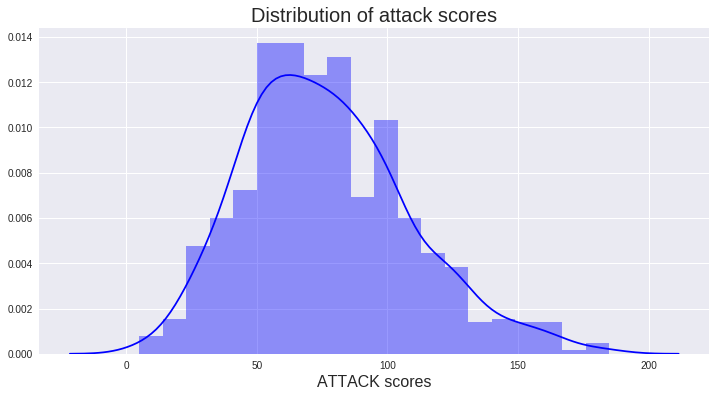

In [19]:
get_poke_stats(pokedex_df, 'attack', 'blue')

### Defense score

The mean defense score across the pokedex is 72.3911234397
--------------------------------------------------------------------------------
Maximum defense score 230 for Shuckle
Minimum defense score 5 for Happiny


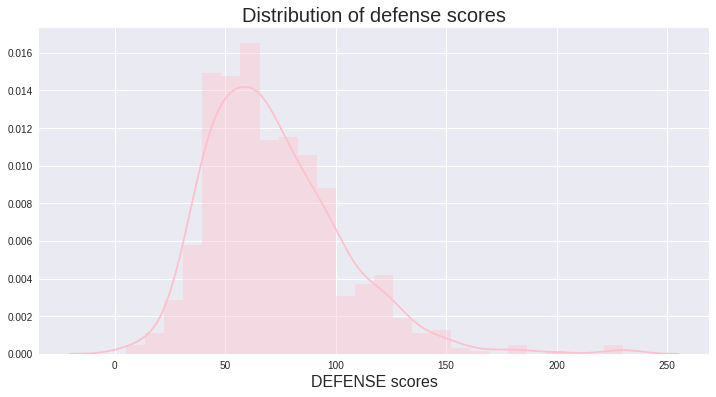

In [20]:
get_poke_stats(pokedex_df, 'defense', 'pink')

### Special Attack

The mean special_attack score across the pokedex is 70.4937586685
--------------------------------------------------------------------------------
Maximum special_attack score 194 for MewtwoMega Mewtwo Y
Minimum special_attack score 10 for Shuckle


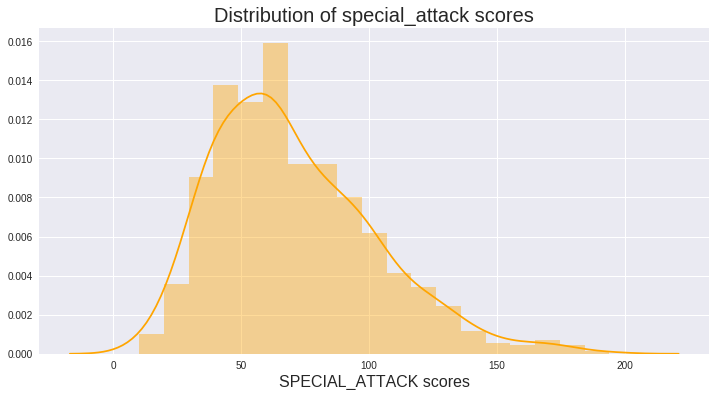

In [21]:
get_poke_stats(pokedex_df, 'special_attack', 'orange')

### Speed

The mean speed score across the pokedex is 66.5006934813
--------------------------------------------------------------------------------
Maximum speed score 180 for DeoxysSpeed Forme
Minimum speed score 5 for Munchlax


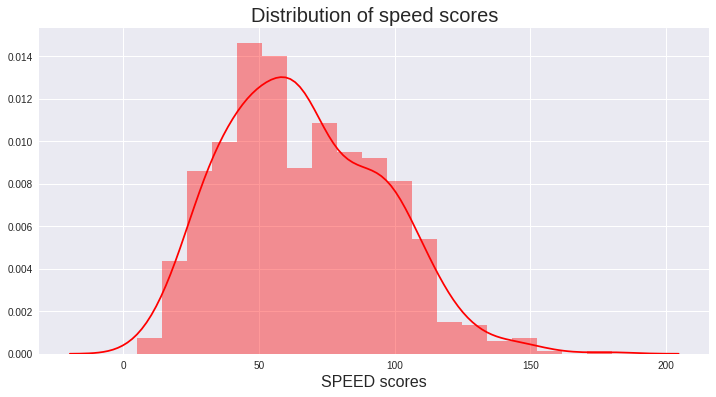

In [22]:
get_poke_stats(pokedex_df, 'speed', 'red')

### HP

The mean hp score across the pokedex is 68.4216366158
--------------------------------------------------------------------------------
Maximum hp score 255 for Blissey
Minimum hp score 1 for Shedinja


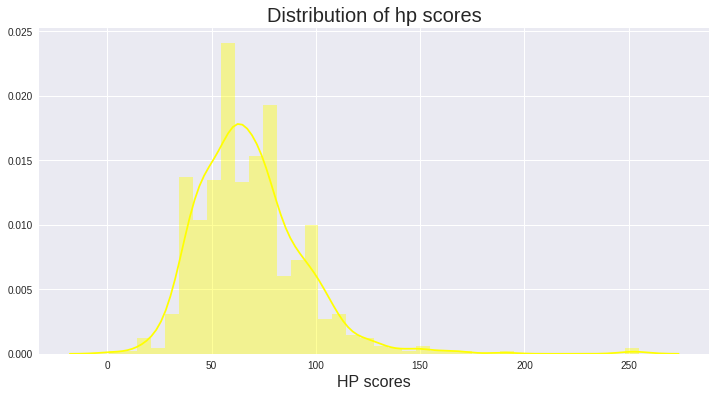

In [23]:
get_poke_stats(pokedex_df, 'hp', 'yellow')

### Special defense

The mean special_defense score across the pokedex is 70.3439667129
--------------------------------------------------------------------------------
Maximum special_defense score 230 for Shuckle
Minimum special_defense score 20 for Magikarp


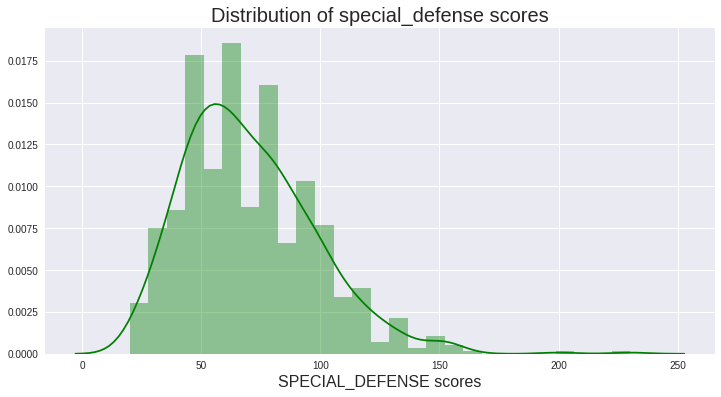

In [24]:
get_poke_stats(pokedex_df, 'special_defense', 'green')

### All skills

/home/vicki/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


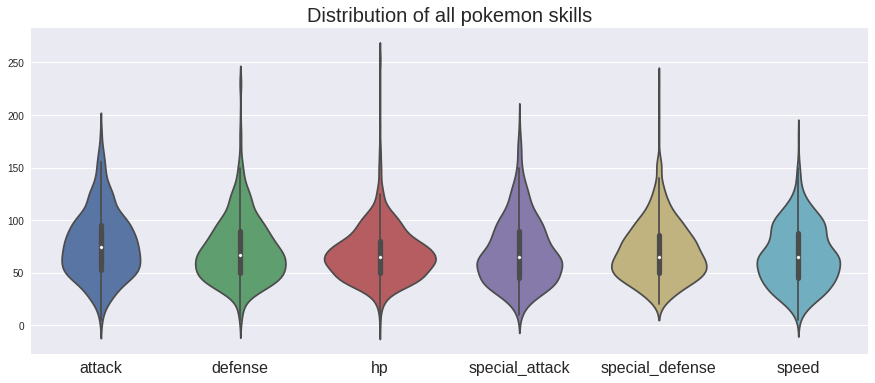

In [25]:
fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(pokedex_df.iloc[:,:7] )
plt.xticks(fontsize=16)
plt.title('Distribution of all pokemon skills', fontsize=20);

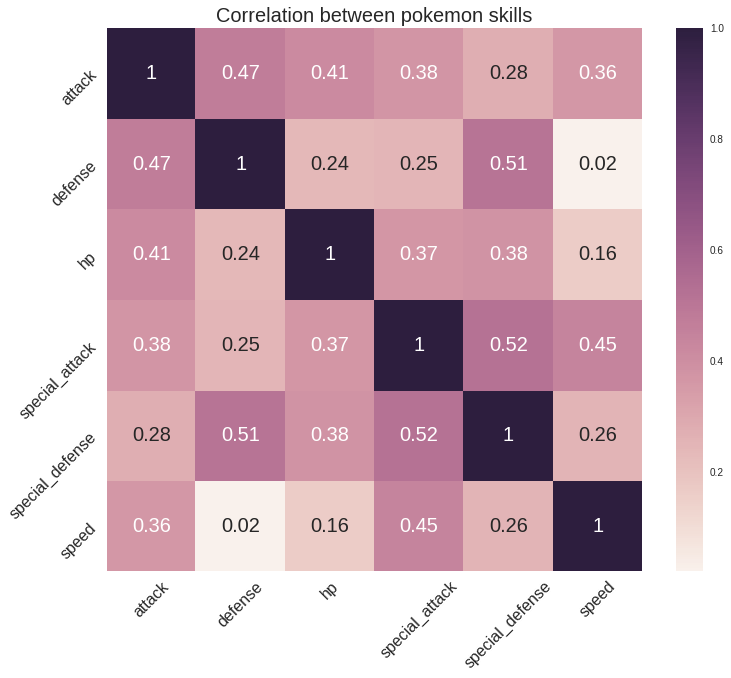

In [26]:
df_corr = pokedex_df.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_corr.iloc[:-2,:-2], annot=True, annot_kws={"size": 20})
plt.xticks(fontsize=16, rotation=45);
plt.yticks(fontsize=16, rotation=45)
plt.title('Correlation between pokemon skills', fontsize=20);

### Totals scores

The mean total score across the pokedex is 424.950069348
The standard deviation of totals score is 118.794185946
--------------------------------------------------------------------------------
Maximum total score 780 for RayquazaMega Rayquaza
Minimum total score 180 for Sunkern


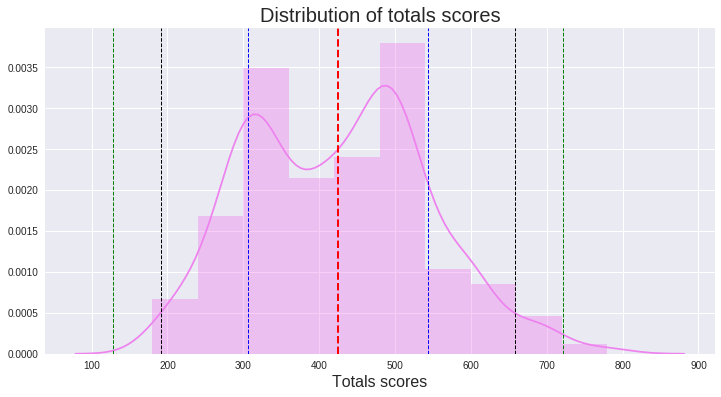

In [27]:
## Plot totals with mean and standard deviation lines
    
## Set figure
fig, ax = plt.subplots(figsize=(12, 6))

## plot distribution
sns.distplot(pokedex_df['total'], color='violet', bins=10);

## Set title
title = 'Distribution of totals scores'
plt.title(title, fontsize=20)

## Set x label
xlabel = 'Totals scores'
plt.xlabel(xlabel, fontsize=16);

pokedex_groupby = pokedex_df.groupby('total').mean() 
mean_column = pokedex_groupby.reset_index() #.sort_values(column ,ascending=True).reset_index()

mean = pokedex_df['total'].mean()
total_std = pokedex_df['total'].std()
## Add mean and standard deviation lines to plot
ax.axvline(x = mean, color='r', linestyle='dashed', linewidth=2)
ax.axvline(x = mean - total_std, color='b', linestyle='dashed', linewidth=1)
ax.axvline(x = mean + total_std, color='b', linestyle='dashed', linewidth=1)
ax.axvline(x = mean - total_std*1.96, color='k', linestyle='dashed', linewidth=1)
ax.axvline(x = mean + total_std*1.96, color='k', linestyle='dashed', linewidth=1)
ax.axvline(x = mean - total_std*2.5, color='g', linestyle='dashed', linewidth=1)
ax.axvline(x = mean + total_std*2.5, color='g', linestyle='dashed', linewidth=1)
## Print summary statistics
print ('The mean total score across the pokedex is {}'.format(pokedex_df['total'].mean()))
print ('The standard deviation of totals score is {}'.format(pokedex_df['total'].std()))
print ('-'* 80)
print ('Maximum total score {} for {}'.format(pokedex_df['total'].max(), pokedex_df.sort_values('total', ascending=False).head(1)[['name']].iloc[0][0]))
print ('Minimum total score {} for {}'.format(pokedex_df['total'].min(), pokedex_df.sort_values('total', ascending=True).head(1)[['name']].iloc[0][0]))


In [28]:
total_over_25_std = pokedex_df[pokedex_df['total']>mean+(total_std*2.5)].count()['total']

print ('Mean total score across pokemon characters is {}'.format(pokedex_df['total'].mean()))
print ('The standard deviation across pokemon characters is {}'.format(pokedex_df['total'].std()))
print ('{} pokemon have a total score greater than 2.5 standard deviations from the mean'.format(total_over_25_std))

Mean total score across pokemon characters is 424.950069348
The standard deviation across pokemon characters is 118.794185946
4 pokemon have a total score greater than 2.5 standard deviations from the mean


## 10. Calibrate the frequency of Pokemon

Make the Pokemon with higher total scores more rare and the weaker pokemon more common. 



In [126]:
def probability(x):
    ## less than -2.5 std
    if x < mean - (total_std * 2.5):
        return 6
    ## between -2.5 and -1 std
    if x >= mean - (total_std * 2.5) and x < mean - (total_std * .7):
        return 5
    ## between -1 and 0 std
    elif x >= mean - (total_std * .7) and x < mean + (total_std * .4):
        return 4
    ## between 0 and 1 std
    elif x >= mean - (total_std * .4) and x < mean + (total_std * .85):
        return 3
    ## between 1 and +2.5 std
    elif x >= mean + (total_std * .85) and x < mean + (total_std * 2):
        return 2
    ## over +2.5 std
    elif x >= mean + (total_std * 2):
        return 1

In [127]:
## Return the probability of finding a pokemon based on the total score
## More powerfull pokemon are more rare
## Higher number indicate less probability of catching
pokedex_df['prob'] = pokedex_df['total'].map(lambda x : probability(x))

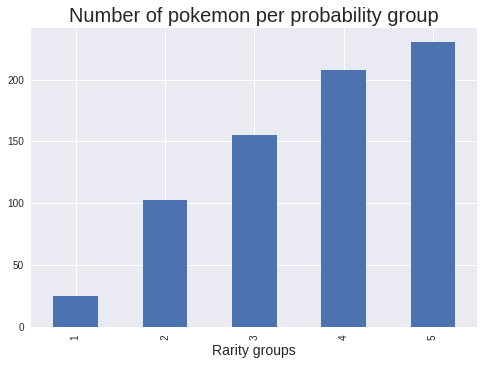

In [130]:
pokedex_df.groupby('prob').agg(len)[['total']].plot(kind='bar')
plt.title('Number of pokemon per probability group', fontsize=20)
plt.xlabel('Rarity groups', fontsize=14)
plt.legend('');

In [139]:
## Determine the probability of catching pokemon from all probability groups
prob5 = pokedex_df[pokedex_df['prob']==5].count()['attack']
prob4 = pokedex_df[pokedex_df['prob']==4].count()['attack']
prob3 = pokedex_df[pokedex_df['prob']==3].count()['attack']
prob2 = pokedex_df[pokedex_df['prob']==2].count()['attack']
prob1 = pokedex_df[pokedex_df['prob']==1].count()['attack']

total = prob1 + prob2 + prob3 + prob4 + prob5

In [148]:
print ('Probability of catching a level 5 pokemeon is {:.2f}%'.format(prob5/total))
print ('Probability of catching a level 4 pokemeon is {:.2f}%'.format(prob4/total))
print ('Probability of catching a level 3 pokemeon is {:.2f}%'.format(prob3/total))
print ('Probability of catching a level 2 pokemeon is {:.2f}%'.format(prob2/total))
print ('Probability of catching a level 1 pokemeon is {:.2f}%'.format(prob1/total))

Probability of catching a level 5 pokemeon is 0.32%
Probability of catching a level 4 pokemeon is 0.29%
Probability of catching a level 3 pokemeon is 0.21%
Probability of catching a level 2 pokemeon is 0.14%
Probability of catching a level 1 pokemeon is 0.03%
